In [1]:
import numpy as np
from yellowbrick.classifier import ConfusionMatrix
import pandas as pd

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-lenght', 'petal-width', 'Class']
dataset = pd.read_csv(url, names=names)

In [3]:
dataset

,sepal-length,sepal-width,petal-lenght,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# Divisão dos Dados

In [4]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 4].values

In [6]:
from sklearn.model_selection import train_test_split
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.20)

In [7]:
X_treino.shape, y_treino.shape

((120, 4), (120,))

In [8]:
X_teste.shape, y_teste.shape

((30, 4), (30,))

# Padronização Dados

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
scaler = StandardScaler()
scaler.fit(X_treino)

X_treino = scaler.transform(X_treino)
X_teste = scaler.transform(X_teste)

# Treinamento Modelo

In [12]:
from sklearn.neighbors import KNeighborsClassifier

In [13]:
knn_classe = KNeighborsClassifier(n_neighbors=6)
knn_classe.fit(X_treino, y_treino)

KNeighborsClassifier(n_neighbors=6)

In [14]:
previsoes = knn_classe.predict(X_teste)

In [15]:
previsoes

array(['Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor'],
      dtype=object)

In [16]:
y_teste

array(['Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor'],
      dtype=object)

# Métricas Modelo

In [17]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [18]:
accuracy_score(y_teste, previsoes)

0.8666666666666667

In [19]:
print(classification_report(y_teste, previsoes))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.75      1.00      0.86        12
 Iris-virginica       1.00      0.64      0.78        11

       accuracy                           0.87        30
      macro avg       0.92      0.88      0.88        30
   weighted avg       0.90      0.87      0.86        30



In [20]:
confusion_matrix(y_teste, previsoes)

array([[ 7,  0,  0],
       [ 0, 12,  0],
       [ 0,  4,  7]], dtype=int64)

0.8666666666666667

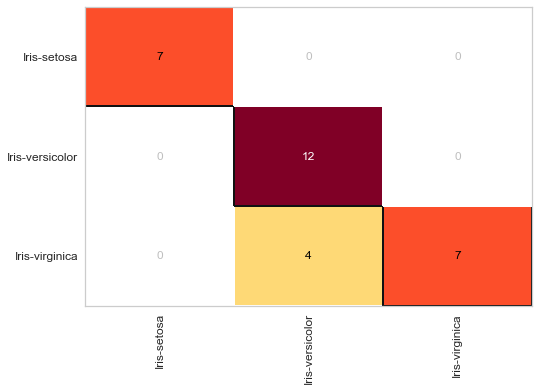

In [21]:
cm = ConfusionMatrix(knn_classe)
cm.fit(X_treino, y_treino)
cm.score(X_teste, y_teste)